## Sequence spectra

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

# Filter the plot warning
warnings.filterwarnings( "ignore" )

# Numpy random seed
np.random.seed(0)

###  Sequence spectra with periodogram

Function `periodogramSpectrum` transforms the sequence data to its power spectral density with the `scipy.signal.periodogram`.

#### Function help

In [2]:
from ffpack.lsm import periodogramSpectrum
help( periodogramSpectrum )

Help on function periodogramSpectrum in module ffpack.lsm.sequenceSpectra:

periodogramSpectrum(data, fs)
    Power spectral density with `scipy.signal.periodogram`.
    
    Parameters
    ----------
    data: 1darray
        Sequence to calculate power spectral density.
    fs: scalar
        Sampling frequency.
    
    Returns
    -------
    freq: 1darray
        frequency components.
    psd: 1darray
        Power spectral density. 
    
    Raises
    ------
    ValueError
        If data is not a 1darray.
        If fs is not a scalar.
    
    Examples
    --------
    >>> from ffpack.lsm import periodogramSpectrum
    >>> data = [ 2, 5, 3, 6, 2, 4, 1, 6, 1, 3, 1, 5, 3, 6, 3, 6, 4, 5, 2 ]
    >>> fs = 2
    >>> freq, psd = periodogramSpectrum( data, fs )



#### Example with generated data

In [3]:
gfs = 1000  # 1kHz sampling frequency
fs1 = 10    # first signal component at 10 Hz
fs2 = 60    # second signal component at 60 Hz
T = 10      # 10s signal length
n0 = -10    # noise level (dB)

In [4]:
t = np.r_[ 0: T: ( 1 / gfs ) ]  # sample time
gdata = np.sin( 2 * fs1 * np.pi * t ) + np.sin( 2 * fs2 * np.pi * t ) 

# white noise with power n0
gdata += np.random.randn( len( gdata ) ) * 10**( n0 / 20.0 ) 

In [5]:
gfreq, gpsd = periodogramSpectrum( gdata, gfs )

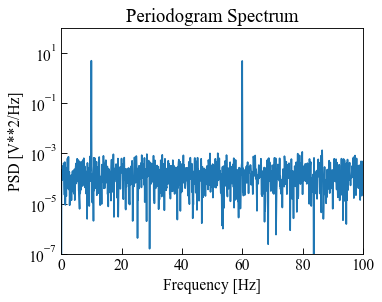

In [6]:
fig, ax = plt.subplots()
plt.yscale("log")

ax.semilogy( np.array( gfreq ),
             np.array( gpsd ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')

ax.set_ylim( [ 1e-7, 1e2 ] )
ax.set_xlim( [ 0, 100 ] )

ax.set_xlabel( "Frequency [Hz]" )
ax.set_ylabel( "PSD [V**2/Hz]" )
ax.set_title( "Periodogram Spectrum" )

plt.tight_layout()
plt.show()

###  Davenport Spectrum with Roughness Length

The Davenport spectrum in the paper by Hiriart et al. can be expressed,

$$
\frac{nS(n)}{u_{f}^{2}} = 4.0 \frac{x^{2}}{(1 + x^{2})^{4/3}}
$$

$$
x = \frac{1200n}{u_{f}}
$$

where $S(n)$ is the power spectrum density ( $m^2 s^{-2} Hz^{-1}$ ); $n$ is the frequency; $u_{f}$ is the friction velocity ( $m/s$ ); $u_{z}$ is the mean wind speed ( $m/s$ ) measured at height $z$; $z$ is the height above the ground, default value = 10 $m$; $z_{0}$ is the roughness length, default value = 0.03 $m$ corresponding to open exposure case in NIST database. 

The friction velocity $u_{f}$ is calculated as
$$
u_{f} = \frac{ku_{z}}{ln(z/z_{0})}
$$
where $k$ is the von Karman's constant and $k=0.4$.

The normalized power spectrum density is defined as
$$
\frac{nS(n)}{u_{f}^{2}}
$$

The normalized frequency is expressed as
$$
\frac{nz}{u_{f}}
$$

Function `davenportSpectrumWithRoughnessLength` implements the Davenport spectrum in the paper by Hiriart et al.

Reference: 

* Hiriart, D., Ochoa, J. L., & Garcia, B. (2001). Wind power spectrum measured at the San Pedro Mártir Sierra. Revista Mexicana de Astronomia y Astrofisica, 37(2), 213-220.
* Ho, T. C. E., Surry, D., & Morrish, D. P. (2003). NIST/TTU cooperative agreement-windstorm mitigation initiative: Wind tunnel experiments on generic low buildings. London, Canada: BLWTSS20-2003, Boundary-Layer Wind Tunnel Laboratory, Univ. of Western Ontario.

#### Function help

In [7]:
from ffpack.lsm import davenportSpectrumWithRoughnessLength
help( davenportSpectrumWithRoughnessLength )

Help on function davenportSpectrumWithRoughnessLength in module ffpack.lsm.windSpectra:

davenportSpectrumWithRoughnessLength(n, uz, z=10, z0=0.03, normalized=True)
    Davenport spectrum in the paper by Hiriart et al. [Hiriart2001]_.
    
    Parameters
    ----------
    n: scalar
        Frequency ( Hz ) when normalized=False.
        Normalized frequency when normalized=True.
    uz: scalar
        Mean wind speed ( m/s ) measured at height z.
    z: scalar, optional
        Height above the ground ( m ), default to 10 m. 
    z0: scalar, optional
        Roughness length ( m ), default to 0.03 m corresponding to open 
        exposure case in [Ho2003]_.
    normalized: bool, optional
        If normalized is set to False, the power spectrum density will be returned.
    
    Returns
    -------
    rst: scalar
        Power spectrum density ( m^2 s^-2 Hz^-1 ) when normalized=False.
        Normalized power spectrum density when normalized=True.
    
    Raises
    ------
    Value

#### Example with default values

In [8]:
dsrnRange = [ 10**i for i in np.linspace( -3, 2, num=121 ) ]

In [9]:
uz = 10
dsrnResults = [ davenportSpectrumWithRoughnessLength( n, uz, normalized=True ) 
                for n in dsrnRange ]

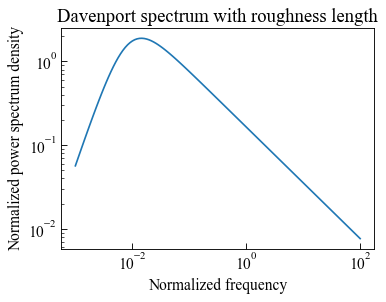

In [10]:
fig, ax = plt.subplots()
plt.xscale("log")
plt.yscale("log")

ax.plot( np.array( dsrnRange ),
         np.array( dsrnResults ) )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.tick_params(axis='x', direction="in", length=3, which='minor')
ax.tick_params(axis='y', direction="in", length=3, which='minor')
ax.set_xlabel( "Normalized frequency" )
ax.set_ylabel( "Normalized power spectrum density" )
ax.set_title( "Davenport spectrum with roughness length" )

plt.tight_layout()
plt.show()